# The Spark Foundation - Data Science and Business Analytics Internship 


# Grip @ The Spark Foundation


# By Muhammad Tabish


# Task 1: Prediction using Supervised ML



# Problem Statement: 

# -Predict the Percentage of a student based on the no of study hours.
# -What will be a predict score if a student studies for 9.25 hrs/day?

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Read the csv dataset as a pandas dataframe

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data is clean

Here we will plot our data to check the relation between two variables.

# visualize the data

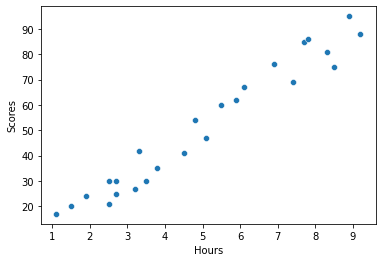

In [7]:
sns.scatterplot(x = 'Hours', y = 'Scores', data = data );

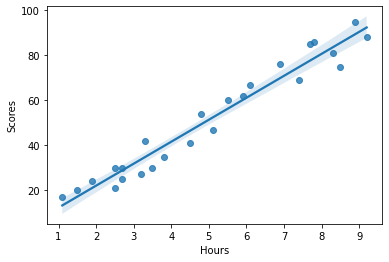

In [8]:
sns.regplot(x = 'Hours', y = 'Scores', data = data );

# Seprate feature and target

In [9]:
X = data[('Hours')]
y = data [('Scores')]

# Preparing the Data

In [10]:
# Let's split our data into inputs and outputs
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

# Train- Test Split

In [11]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#show the result of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 5 samples.


# Model Buliding

In [13]:

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Now let's predict student's scores.
y_pred = model.predict(X_test)
print(X_test, y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
# The result above shows that student scores increase with the studing hours

# Testing the Model

In [16]:
#lets comapre between the actual and predicited scores
pd.DataFrame({'Actual': y_test, 'predicted': y_pred})

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


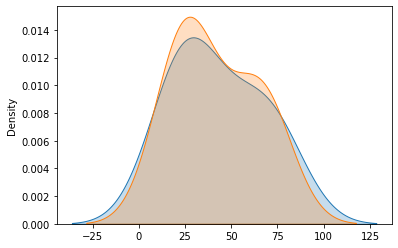

In [17]:
#Actual vs Predicted distribution plot
sns.kdeplot(y_pred,label="Predicted", shade=True);

sns.kdeplot(data=y_test,label="Actual", shade=True);

In [18]:
#here we will predict the score for specific studying hours.

study_hours = 9.25
sc_pred = model.predict([[study_hours]])
print("No of Hours = {}". format(study_hours))
print("Predicted Score = {}". format(sc_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# Evaluating the model
Finally reached our final step in the project.  We are going to evalute our regression model using r2 method.

In [19]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9454906892105355


The normal case is when the R2 score is between zero and one. 0.95 means our model is capable to explain 95 per cent of the variance of data.